# Examining Task A 4 files separately
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/participantstaska1/Participant22A1.csv
/kaggle/input/participantstaska1/Participant30A1.csv
/kaggle/input/participantstaska1/Participant28A1.csv
/kaggle/input/participantstaska1/Participant3A1.csv
/kaggle/input/participantstaska1/Participant10A1.csv
/kaggle/input/participantstaska1/Participant8A1.csv
/kaggle/input/participantstaska1/Participant7A1.csv
/kaggle/input/participantstaska1/Participant14A1.csv
/kaggle/input/participantstaska1/Participant26A1.csv
/kaggle/input/participantstaska1/Participant6A1.csv
/kaggle/input/participantstaska1/Participant25A1.csv
/kaggle/input/participantstaska1/Participant18A1.csv
/kaggle/input/participantstaska1/Participant23A1.csv
/kaggle/input/participantstaska1/Participant19A1.csv
/kaggle/input/participantstaska1/Participant11A1.csv
/kaggle/input/participantstaska1/Participant24A1.csv
/kaggle/input/participantstaska1/Participant15A1.csv
/kaggle/input/participantstaska1/Participant9A1.csv
/kaggle/input/participantstaska1/Participant1A1.csv

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions

from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import DistanceMetric
from sklearn.metrics import RocCurveDisplay
from imblearn.under_sampling import RandomUnderSampler

%matplotlib inline

In [11]:
DF_listA1 = list()
DF_listA2 = list()
DF_listA3 = list()
DF_listA4 = list()
DF_listA= list()


In [12]:
DF_listA1.clear()
DF_listA2.clear()
DF_listA3.clear()
DF_listA4.clear() 
DF_listA.clear()

In [13]:
result1 = list()
result2 = list()
result3 = list()
result4 = list()

In [14]:
for i in range (0, 30):
    DF_listA1.insert(i, pd.read_csv('../input/participantstaska1/Participant'+str(i+1)+'A1.csv') )

In [15]:
for i in range (0, 30):
    DF_listA2.insert(i, pd.read_csv('../input/participantstaska2/Participant'+str(i+1)+'A2.csv') )

In [16]:
for i in range (0, 30):
    DF_listA3.insert(i, pd.read_csv('../input/participantstaska3/Participant'+str(i+1)+'A3.csv') )

In [17]:
for i in range (0, 30):
    DF_listA4.insert(i, pd.read_csv('../input/participantstaska4/Participant'+str(i+1)+'A4.csv') )

In [18]:
for i in range (0, 30):
    DF_listA.insert(i, pd.read_csv('../input/participantstaska/Participant'+str(i+1)+'.csv') )

In [19]:
for i in range (0, 30):
    DF_listA1[i]= DF_listA1[i].iloc[: , 1:]
    DF_listA2[i]= DF_listA2[i].iloc[: , 1:]
    DF_listA3[i]= DF_listA3[i].iloc[: , 1:]
    DF_listA4[i]= DF_listA4[i].iloc[: , 1:]

In [20]:
result1 = pd.concat(DF_listA1, ignore_index=True)
result2 = pd.concat(DF_listA2, ignore_index=True)
result3 = pd.concat(DF_listA3, ignore_index=True)
result4 = pd.concat(DF_listA4, ignore_index=True)

In [21]:
rus = RandomUnderSampler(sampling_strategy='majority', random_state=42)

<br>

## Exploratory Data Analysis
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [ ]:
print(result1['event'].value_counts())
print(" ")
print(result2['event'].value_counts())
print(" ")
print(result3['event'].value_counts())
print(" ")
print(result4['event'].value_counts())

In [ ]:
fig, ax = plt.subplots(figsize = (20,5))
sns.boxplot(result1['0_aac'])
plt.show()

In [ ]:
fig = plt.figure(figsize = (30,25))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)



ax1.set_title('Left Frontalis')
ax2.set_title('Right Frontalis')
ax3.set_title('Left Zygomaticus')
ax4.set_title('Right Zygomaticus')



ax1.scatter(result1['event'], result1['0_aac'])
ax2.scatter(result1['event'], result1['6_aac'])
ax3.scatter(result1['event'], result1['1_aac'])
ax4.scatter(result1['event'], result1['5_rms'])

In [ ]:
fig = plt.figure(figsize = (30,25))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)



ax1.set_title('Left Frontalis')
ax2.set_title('Right Frontalis')
ax3.set_title('Left Zygomaticus')
ax4.set_title('Right Zygomaticus')



ax1.scatter(result2['event'], result2['0_aac'])
ax2.scatter(result2['event'], result2['6_aac'])
ax3.scatter(result2['event'], result2['1_aac'])
ax4.scatter(result2['event'], result2['5_rms'])

In [ ]:
fig = plt.figure(figsize = (30,25))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)



ax1.set_title('Left Frontalis')
ax2.set_title('Right Frontalis')
ax3.set_title('Left Zygomaticus')
ax4.set_title('Right Zygomaticus')



ax1.scatter(result3['event'], result3['0_aac'])
ax2.scatter(result3['event'], result3['6_aac'])
ax3.scatter(result3['event'], result3['1_aac'])
ax4.scatter(result3['event'], result3['5_rms'])

In [ ]:
fig = plt.figure(figsize = (30,25))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)



ax1.set_title('Left Frontalis')
ax2.set_title('Right Frontalis')
ax3.set_title('Left Zygomaticus')
ax4.set_title('Right Zygomaticus')



ax1.scatter(result4['event'], result4['0_aac'])
ax2.scatter(result4['event'], result4['6_aac'])
ax3.scatter(result4['event'], result4['1_aac'])
ax4.scatter(result4['event'], result4['5_rms'])

## Splitting the datasets 
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [22]:
training_subjects = np.array([1, 4, 5, 7, 9, 10, 11, 14, 2, 16, 17, 19, 21, 22, 23, 24, 26, 27, 29, 30])
validation_subjects = np.array([3, 6, 12, 20, 25])
test_subjects = np.array([15,8,13,18,28])

DF_train1 = list()
DF_validation1 = list()
DF_test1 = list()

DF_train2 = list()
DF_validation2 = list()
DF_test2 = list()

DF_train3 = list()
DF_validation3 = list()
DF_test3 = list()

DF_train4 = list()
DF_validation4 = list()
DF_test4 = list()

a1=0
a2=0
a3=0
a4=0

In [23]:
for i in training_subjects:
    DF_train1.insert(a1, DF_listA1[i-1])
    a1=a1+1

for i in training_subjects:
    DF_train2.insert(a2, DF_listA2[i-1])
    a2=a2+1

for i in training_subjects:
    DF_train3.insert(a3, DF_listA3[i-1])
    a3=a3+1

for i in training_subjects:
    DF_train4.insert(a4, DF_listA4[i-1])
    a4=a4+1

In [24]:
a1=0
a2=0
a3=0
a4=0

for i in validation_subjects:
    DF_validation1.insert(a1, DF_listA1[i-1])
    a1=a1+1

for i in validation_subjects:
    DF_validation2.insert(a2, DF_listA2[i-1])
    a2=a2+1

for i in validation_subjects:
    DF_validation3.insert(a3, DF_listA3[i-1])
    a3=a3+1

for i in validation_subjects:
    DF_validation4.insert(a4, DF_listA4[i-1])
    a4=a4+1

In [25]:
a1=0
a2=0
a3=0
a4=0

for i in test_subjects:
    DF_test1.insert(a1, DF_listA1[i-1])
    a1=a1+1

for i in validation_subjects:
    DF_test2.insert(a2, DF_listA2[i-1])
    a2=a2+1

for i in validation_subjects:
    DF_test3.insert(a3, DF_listA3[i-1])
    a3=a3+1

for i in validation_subjects:
    DF_test4.insert(a4, DF_listA4[i-1])
    a4=a4+1

## Creating the full dataset Task A

In [28]:
DF_train = list()
DF_validation = list()
DF_test = list()
k=0

In [29]:
for i in training_subjects:
    DF_train.insert(k, DF_listA[i-1])
    k=k+1

k=0
for i in validation_subjects:
    DF_validation.insert(k, DF_listA[i-1])
    k=k+1
    
k=0
for i in test_subjects:
    DF_test.insert(k, DF_listA[i-1])
    k=k+1

In [30]:
trainData = pd.concat(DF_train, ignore_index=True)
validData = pd.concat(DF_validation, ignore_index=True)
testData = pd.concat (DF_test, ignore_index=True)

X_train = trainData.drop(['event'], axis=1)
y_train = pd.DataFrame(trainData.iloc[:,-1])

X_valid = validData.drop(['event'], axis=1)
y_valid = pd.DataFrame(validData.iloc[:,-1])

X_test = testData.drop(['event'], axis=1)
y_test = pd.DataFrame(testData.iloc[:,-1])

In [31]:
y_train

,event
0,neutral
1,neutral
2,neutral
3,neutral
4,neutral
...,...
82905,neutral
82906,neutral
82907,neutral
82908,neutral


In [32]:
trainData1 = pd.concat(DF_train1, ignore_index=True)
validData1 = pd.concat(DF_validation1, ignore_index=True)
testData1 = pd.concat (DF_test1, ignore_index=True)

trainData2 = pd.concat(DF_train2, ignore_index=True)
validData2 = pd.concat(DF_validation2, ignore_index=True)
testData2 = pd.concat (DF_test2, ignore_index=True)


trainData3 = pd.concat(DF_train3, ignore_index=True)
validData3 = pd.concat(DF_validation3, ignore_index=True)
testData3 = pd.concat (DF_test3, ignore_index=True)


trainData4 = pd.concat(DF_train4, ignore_index=True)
validData4 = pd.concat(DF_validation4, ignore_index=True)
testData4 = pd.concat (DF_test4, ignore_index=True)

X_train1 = trainData1.drop(['event'], axis=1)
y_train1 = pd.DataFrame(trainData1.iloc[:,-1])

X_valid1 = validData1.drop(['event'], axis=1)
y_valid1 = pd.DataFrame(validData1.iloc[:,-1])

X_test1 = testData1.drop(['event'], axis=1)
y_test1 = pd.DataFrame(testData1.iloc[:,-1])

X_train2 = trainData2.drop(['event'], axis=1)
y_train2 = pd.DataFrame(trainData2.iloc[:,-1])

X_valid2 = validData2.drop(['event'], axis=1)
y_valid2 = pd.DataFrame(validData2.iloc[:,-1])

X_test2 = testData2.drop(['event'], axis=1)
y_test2 = pd.DataFrame(testData2.iloc[:,-1])

X_train3 = trainData3.drop(['event'], axis=1)
y_train3 = pd.DataFrame(trainData3.iloc[:,-1])

X_valid3 = validData3.drop(['event'], axis=1)
y_valid3 = pd.DataFrame(validData3.iloc[:,-1])

X_test3 = testData3.drop(['event'], axis=1)
y_test3 = pd.DataFrame(testData3.iloc[:,-1])

X_train4 = trainData4.drop(['event'], axis=1)
y_train4 = pd.DataFrame(trainData4.iloc[:,-1])

X_valid4 = validData4.drop(['event'], axis=1)
y_valid4 = pd.DataFrame(validData4.iloc[:,-1])

X_test4 = testData4.drop(['event'], axis=1)
y_test4 = pd.DataFrame(testData4.iloc[:,-1])

In [33]:
X_test1

,0_iav,0_aac,0_ar1,0_ar2,0_ar3,0_ar4,0_cc1,0_cc2,0_cc3,0_cc4,...,6_wl,6_mnf,6_mdf,6_pkf,6_mnp,6_ttp,6_vcf,6_psr,6_ohm,6_maxx
0,0.000219,4.809453e-08,-0.004347,1.003534,-1.008883,1.009698,0.004347,-1.005715,-0.005766,-1.000965,...,3.258210e-07,527.467719,501.76,501.76,9.462883e-18,2.375184e-15,71289.551071,71289.551071,1.120818,2.348907e-07
1,0.000219,5.144838e-08,-0.003842,1.008477,-1.014018,1.009377,0.003842,-1.010414,-0.010560,-0.993388,...,-1.396142e-07,520.350447,501.76,501.76,1.047426e-17,2.629039e-15,58933.125665,58933.125665,1.103474,2.351753e-07
2,0.000260,2.573178e-07,0.072516,0.144209,-0.311187,0.694648,-0.072516,-0.138980,0.267938,-0.973832,...,-4.975523e-07,582.981459,522.24,10.24,2.792741e-16,7.009779e-14,339091.936690,339091.936690,1.413407,2.347808e-07
3,0.000306,4.859360e-07,-0.062021,0.126996,-0.293356,0.533384,0.062021,-0.130934,0.254946,-0.737361,...,1.549276e-06,647.670186,522.24,10.24,5.494465e-16,1.379111e-13,353734.086239,353734.086239,1.357673,2.353390e-07
4,0.000371,7.321674e-07,-0.138099,0.066198,-0.370144,0.438356,0.138099,-0.070769,0.343949,-0.664514,...,2.184624e-06,738.890125,645.12,10.24,7.680251e-16,1.927743e-13,323564.089476,323564.089476,1.262004,2.342667e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945,0.000491,1.254938e-06,-0.219165,0.022962,-0.506757,0.269984,0.219165,-0.025478,0.493846,-0.469980,...,-8.748650e-07,1042.978798,972.80,542.72,7.479397e-16,1.877329e-13,254913.839154,254913.839154,1.111008,1.830114e-07
3946,0.000508,1.292050e-06,-0.224140,0.021111,-0.497609,0.303623,0.224140,-0.023477,0.485927,-0.524930,...,-1.132534e-06,1025.946857,962.56,542.72,7.758097e-16,1.947282e-13,246871.204570,246871.204570,1.111099,2.058054e-07
3947,0.000565,1.382465e-06,-0.278659,0.039561,-0.548364,0.323953,0.278659,-0.045073,0.523647,-0.578409,...,-1.626378e-06,1032.016686,983.04,952.32,7.953933e-16,1.996437e-13,231078.274504,231078.274504,1.103160,1.984567e-07
3948,0.000574,1.411786e-06,-0.287462,0.053278,-0.553194,0.316935,0.287462,-0.060936,0.519485,-0.563899,...,4.091079e-07,1050.534167,1003.52,1013.76,7.682633e-16,1.928341e-13,226050.804776,226050.804776,1.097646,1.867573e-07


<br>

In [ ]:
X_train1, y_train1 = rus.fit_resample(X_train1, y_train1)
X_train2, y_train2 = rus.fit_resample(X_train2, y_train2)
X_train3, y_train3 = rus.fit_resample(X_train3, y_train3)
X_train4, y_train4 = rus.fit_resample(X_train4, y_train4)

In [ ]:
y_train4.value_counts()

## Training and Testing the Model
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Dummy Classifier

In [ ]:
dclf1 = DummyClassifier(strategy="most_frequent", random_state = 0)
dclf1.fit(X_train1, y_train1)

In [ ]:
score_dummy1 = dclf1.score(X_valid1, y_valid1)
y_pred_dummy1 = dclf1.predict(X_valid1)
f1_dummy1=f1_score(y_valid1, y_pred_dummy1, average='macro')
print ('Accuracy: '+str(score_dummy1*100)+' %')
print ('F1-Score: '+str(f1_dummy1))

In [ ]:
score_dummy1 = dclf1.score(X_test1, y_test1)
y_pred_dummy1 = dclf1.predict(X_test1)
f1_dummy1=f1_score(y_test1, y_pred_dummy1, average='macro')
print ('Accuracy: '+str(score_dummy1*100)+' %')
print ('F1-Score: '+str(f1_dummy1))

In [ ]:
plot_confusion_matrix(estimator=dclf1, X=X_test1, y_true=y_test1,
                      normalize='true', cmap='Blues')

### Decision Tree

In [ ]:
clf_tree1 = tree.DecisionTreeClassifier()
clf_tree1.fit(X_train1, y_train1)

In [ ]:
score_tree1 = clf_tree1.score(X_valid1, y_valid1)
y_pred_tree1 = clf_tree1.predict(X_valid1)
f1_tree1=f1_score(y_valid1, y_pred_tree1, average='macro')
print ('Accuracy: '+str(score_tree1*100)+' %')
print ('F1-Score: '+str(f1_tree1))


In [ ]:

plot_confusion_matrix(estimator=clf_tree1, X=X_valid1, y_true=y_valid1,
                      normalize='true', cmap='Blues')

In [ ]:
score_tree1 = clf_tree1.score(X_test1, y_test1)
y_pred_tree1 = clf_tree1.predict(X_test1)
f1_tree1=f1_score(y_test1, y_pred_tree1, average='macro')
print ('Accuracy: '+str(score_tree1*100)+' %')
print ('F1-Score: '+str(f1_tree1))

In [ ]:
plot_confusion_matrix(estimator=clf_tree1, X=X_test1, y_true=y_test1,
                      normalize='true', cmap='Blues')

### Random Forest

In [ ]:
clf_rf1 = RandomForestClassifier(random_state=42)
clf_rf1.fit(X_train1, y_train1)

In [ ]:
y_pred_rf1 = clf_rf1.predict(X_valid1)
score_rf1 = clf_rf1.score(X_valid1, y_valid1)
f1_rf1 = f1_score(y_valid1, y_pred_rf1, average='macro')
print ('Accuracy: '+str(score_rf1*100)+' %')
print ('F1-Score: '+str(f1_rf1))

In [ ]:

plot_confusion_matrix(estimator=clf_rf1, X=X_valid1, y_true=y_valid1,
                      normalize='true', cmap='Blues')

In [ ]:
y_pred_rf1 = clf_rf1.predict(X_test1)
score_rf1 = clf_rf1.score(X_test1, y_test1)
f1_rf1 = f1_score(y_test1, y_pred_rf1, average='macro')
print ('Accuracy: '+str(score_rf1*100)+' %')
print ('F1-Score: '+str(f1_rf1))

In [ ]:
plot_confusion_matrix(estimator=clf_rf1, X=X_test1, y_true=y_test1,
                      normalize='true', cmap='Blues')

### XGBoost

In [49]:
xgb1 = XGBClassifier(n_estimators=100)
le = LabelEncoder()
y_trainXGB1 = le.fit_transform(y_train1)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
xgb1.fit(X_train1, y_trainXGB1)


In [50]:
y_validXGB1 = le.fit_transform(y_valid1)
y_testXGB1 = le.fit_transform(y_test1)

In [ ]:
y_predXGB1 = xgb1.predict(X_valid1)
predictions1 = [round(value) for value in y_predXGB1]
score_xgb1 = accuracy_score(y_validXGB1, predictions1)
f1_xgb1 = f1_score(y_validXGB1, predictions1, average='macro')
print ('Accuracy: '+str(score_xgb1*100)+' %')
print ('F1-Score: '+str(f1_xgb1))

In [ ]:
plot_confusion_matrix(estimator=xgb1, X=X_valid1, y_true=y_validXGB1,
                      normalize='true', cmap='Blues')

In [ ]:
y_predXGB1 = xgb1.predict(X_test1)
predictions1 = [round(value) for value in y_predXGB1]
score_xgb1 = accuracy_score(y_testXGB1, predictions1)
f1_xgb1 = f1_score(y_testXGB1, predictions1, average='macro')
print ('Accuracy: '+str(score_xgb1*100)+' %')
print ('F1-Score: '+str(f1_xgb1))

In [ ]:
plot_confusion_matrix(estimator=xgb1, X=X_test1, y_true=y_testXGB1,
                      normalize='true', cmap='Blues')

<br>

### Dummy2

In [ ]:
dclf2 = DummyClassifier(strategy="most_frequent", random_state = 0)
dclf2.fit(X_train2, y_train2)

In [ ]:
score_dummy2 = dclf2.score(X_valid2, y_valid2)
y_pred_dummy2 = dclf2.predict(X_valid2)
f1_dummy2=f1_score(y_valid2, y_pred_dummy2, average='macro')
print ('Accuracy: '+str(score_dummy2*100)+' %')
print ('F1-Score: '+str(f1_dummy2))


In [ ]:
score_dummy2 = dclf2.score(X_test2, y_test2)
y_pred_dummy2 = dclf2.predict(X_test2)
f1_dummy2=f1_score(y_test2, y_pred_dummy2, average='macro')
print ('Accuracy: '+str(score_dummy2*100)+' %')
print ('F1-Score: '+str(f1_dummy2))


In [ ]:
plot_confusion_matrix(estimator=dclf2, X=X_test2, y_true=y_test2,
                      normalize='true', cmap='Blues')

### Decision Tree 2 

In [ ]:
clf_tree2 = tree.DecisionTreeClassifier()
clf_tree2.fit(X_train2, y_train2)

In [ ]:
score_tree2 = clf_tree2.score(X_valid2, y_valid2)
y_pred_tree2 = clf_tree2.predict(X_valid2)
f1_tree2=f1_score(y_valid2, y_pred_tree2, average='macro')
print ('Accuracy: '+str(score_tree2*100)+' %')
print ('f1-Score: '+str(f1_tree2))


In [ ]:
plot_confusion_matrix(estimator=clf_tree2, X=X_valid2, y_true=y_valid2,
                      normalize='true', cmap='Blues')


In [ ]:
score_tree2 = clf_tree2.score(X_test2, y_test2)
y_pred_tree2 = clf_tree2.predict(X_test2)
f1_tree2=f1_score(y_test2, y_pred_tree2, average='macro')
print ('Accuracy: '+str(score_tree2*100)+' %')
print ('f1-Score: '+str(f1_tree2))

In [ ]:
plot_confusion_matrix(estimator=clf_tree2, X=X_test2, y_true=y_test2,
                      normalize='true', cmap='Blues')

### Random Forest 2 

In [ ]:
clf_rf2 = RandomForestClassifier(random_state=42)
clf_rf2.fit(X_train2, y_train2)

In [ ]:
y_pred_rf2 = clf_rf2.predict(X_valid2)
score_rf2 = clf_rf2.score(X_valid2, y_valid2)
f1_rf2 = f1_score(y_valid2, y_pred_rf2, average='macro')
print ('Accuracy: '+str(score_rf2*100)+' %')
print ('F2-Score: '+str(f1_rf2))

In [ ]:
plot_confusion_matrix(estimator=clf_rf2, X=X_valid2, y_true=y_valid2,
                      normalize='true', cmap='Blues')

In [ ]:
y_pred_rf2 = clf_rf2.predict(X_test2)
score_rf2 = clf_rf2.score(X_test2, y_test2)
f1_rf2 = f1_score(y_test2, y_pred_rf2, average='macro')
print ('Accuracy: '+str(score_rf2*100)+' %')
print ('F2-Score: '+str(f1_rf2))

In [ ]:
plot_confusion_matrix(estimator=clf_rf2, X=X_test2, y_true=y_test2,
                      normalize='true', cmap='Blues')

### XGBoost 2 

In [51]:
xgb2 = XGBClassifier(n_estimators=100)
le = LabelEncoder()
y_trainXGB2 = le.fit_transform(y_train2)

In [ ]:
xgb2.fit(X_train2, y_trainXGB2)

In [52]:
y_validXGB2 = le.fit_transform(y_valid2)
y_testXGB2 = le.fit_transform(y_test2)

In [ ]:
y_predXGB2 = xgb2.predict(X_valid2)
predictions2 = [round(value) for value in y_predXGB2]
score_xgb2 = accuracy_score(y_validXGB2, predictions2)
f1_xgb2 = f1_score(y_validXGB2, predictions2, average='macro')
print ('Accuracy: '+str(score_xgb2*100)+' %')
print ('f1-Score: '+str(f1_xgb2))

In [ ]:
plot_confusion_matrix(estimator=xgb2, X=X_valid2, y_true=y_validXGB2,
                      normalize='true', cmap='Blues')

In [ ]:
y_predXGB2 = xgb2.predict(X_test2)
predictions2 = [round(value) for value in y_predXGB2]
score_xgb2 = accuracy_score(y_testXGB2, predictions2)
f1_xgb2 = f1_score(y_testXGB2, predictions2, average='macro')
print ('Accuracy: '+str(score_xgb2*100)+' %')
print ('f1-Score: '+str(f1_xgb2))

In [ ]:
plot_confusion_matrix(estimator=xgb2, X=X_test2, y_true=y_testXGB2,
                  normalize='true', cmap='Blues')

### Dummy3

In [ ]:
dclf3 = DummyClassifier(strategy="most_frequent", random_state = 0)
dclf3.fit(X_train3, y_train3)

In [ ]:
score_dummy3 = dclf3.score(X_valid3, y_valid3)
y_pred_dummy3 = dclf3.predict(X_valid3)
f1_dummy3=f1_score(y_valid3, y_pred_dummy3, average='macro')
print ('Accuracy: '+str(score_dummy3*100)+' %')
print ('F1-Score: '+str(f1_dummy3))

In [ ]:
score_dummy3 = dclf3.score(X_test3, y_test3)
y_pred_dummy3 = dclf3.predict(X_test3)
f1_dummy3=f1_score(y_test3, y_pred_dummy3, average='macro')
print ('Accuracy: '+str(score_dummy3*100)+' %')
print ('F1-Score: '+str(f1_dummy3))

In [ ]:
plot_confusion_matrix(estimator=dclf3, X=X_test3, y_true=y_test3,
                      normalize='true', cmap='Blues')

### Decision Tree 3

In [ ]:
clf_tree3 = tree.DecisionTreeClassifier()
clf_tree3.fit(X_train3, y_train3)

In [ ]:
score_tree3 = clf_tree3.score(X_valid3, y_valid3)
y_pred_tree3 = clf_tree3.predict(X_valid3)
f1_tree3=f1_score(y_valid3, y_pred_tree3, average='macro')
print ('Accuracy: '+str(score_tree3*100)+' %')
print ('f1-Score: '+str(f1_tree3))


In [ ]:
plot_confusion_matrix(estimator=clf_tree3, X=X_valid3, y_true=y_valid3,
                      normalize='true', cmap='Blues')

In [ ]:
score_tree3 = clf_tree3.score(X_test3, y_test3)
y_pred_tree3 = clf_tree3.predict(X_test3)
f1_tree3=f1_score(y_test3, y_pred_tree3, average='macro')
print ('Accuracy: '+str(score_tree3*100)+' %')
print ('f1-Score: '+str(f1_tree3))

In [ ]:
plot_confusion_matrix(estimator=clf_tree3, X=X_test3, y_true=y_test3,
                      normalize='true', cmap='Blues')

### Random Forest 3

In [ ]:
clf_rf3 = RandomForestClassifier(random_state=43)
clf_rf3.fit(X_train3, y_train3)

In [ ]:
y_pred_rf3 = clf_rf3.predict(X_valid3)
score_rf3 = clf_rf3.score(X_valid3, y_valid3)
f1_rf3 = f1_score(y_valid3, y_pred_rf3, average='macro')
print ('Accuracy: '+str(score_rf3*100)+' %')
print ('F1-Score: '+str(f1_rf3))

In [ ]:
plot_confusion_matrix(estimator=clf_rf3, X=X_valid3, y_true=y_valid3,
                      normalize='true', cmap='Blues')

In [ ]:

y_pred_rf3 = clf_rf3.predict(X_test3)
score_rf3 = clf_rf3.score(X_test3, y_test3)
f1_rf3 = f1_score(y_test3, y_pred_rf3, average='macro')
print ('Accuracy: '+str(score_rf3*100)+' %')
print ('F1-Score: '+str(f1_rf3))

In [ ]:
plot_confusion_matrix(estimator=clf_rf3, X=X_test3, y_true=y_test3,
                      normalize='true', cmap='Blues')

### XGBoost 3

In [56]:
xgb3 = XGBClassifier(n_estimators=100)
le = LabelEncoder()
y_trainXGB3 = le.fit_transform(y_train3)

In [ ]:
xgb3.fit(X_train3, y_trainXGB3)

In [57]:
y_validXGB3 = le.fit_transform(y_valid3)
y_testXGB3 = le.fit_transform(y_test3)

In [55]:
y_predXGB3 = xgb3.predict(X_valid3)
predictions3 = [round(value) for value in y_predXGB3]
score_xgb3 = accuracy_score(y_validXGB3, predictions3)
f1_xgb3 = f1_score(y_validXGB3, predictions3, average='macro')
print ('Accuracy: '+str(score_xgb3*100)+' %')
print ('f1-Score: '+str(f1_xgb3))


NotFittedError: need to call fit or load_model beforehand

In [ ]:
plot_confusion_matrix(estimator=xgb3, X=X_valid3, y_true=y_validXGB3,
                      normalize='true', cmap='Blues')


In [ ]:
y_predXGB3 = xgb3.predict(X_test3)
predictions3 = [round(value) for value in y_predXGB3]
score_xgb3 = accuracy_score(y_testXGB3, predictions3)
f1_xgb3 = f1_score(y_testXGB3, predictions3, average='macro')
print ('Accuracy: '+str(score_xgb3*100)+' %')
print ('f1-Score: '+str(f1_xgb3))

In [ ]:
plot_confusion_matrix(estimator=xgb3, X=X_test3, y_true=y_testXGB3,
                      normalize='true', cmap='Blues')

### Dummy 4

In [ ]:
dclf4 = DummyClassifier(strategy="most_frequent", random_state = 0)
dclf4.fit(X_train4, y_train4)

In [ ]:

score_dummy4 = dclf4.score(X_valid4, y_valid4)
y_pred_dummy4 = dclf4.predict(X_valid4)
f1_dummy4=f1_score(y_valid4, y_pred_dummy4, average='macro')
print ('Accuracy: '+str(score_dummy4*100)+' %')
print ('F1-Score: '+str(f1_dummy4))

In [ ]:
score_dummy4 = dclf4.score(X_test4, y_test4)
y_pred_dummy4 = dclf4.predict(X_test4)
f1_dummy4=f1_score(y_test4, y_pred_dummy4, average='macro')
print ('Accuracy: '+str(score_dummy4*100)+' %')
print ('F1-Score: '+str(f1_dummy4))

In [ ]:
plot_confusion_matrix(estimator=dclf4, X=X_test4, y_true=y_test4,
                      normalize='true', cmap='Blues')

### Decision Tree 4

In [ ]:
clf_tree4 = tree.DecisionTreeClassifier()
clf_tree4.fit(X_train4, y_train4)


In [ ]:
score_tree4 = clf_tree4.score(X_valid4, y_valid4)
y_pred_tree4 = clf_tree4.predict(X_valid4)
f1_tree4=f1_score(y_valid4, y_pred_tree4, average='macro')
print ('Accuracy: '+str(score_tree4*100)+' %')
print ('f1-Score: '+str(f1_tree4))

In [ ]:
plot_confusion_matrix(estimator=clf_tree4, X=X_valid4, y_true=y_valid4,
                      normalize='true', cmap='Blues')


In [ ]:
score_tree4 = clf_tree4.score(X_test4, y_test4)
y_pred_tree4 = clf_tree4.predict(X_test4)
f1_tree4=f1_score(y_test4, y_pred_tree4, average='macro')
print ('Accuracy: '+str(score_tree4*100)+' %')
print ('f1-Score: '+str(f1_tree4))

In [ ]:
plot_confusion_matrix(estimator=clf_tree4, X=X_test4, y_true=y_test4,
                      normalize='true', cmap='Blues')

### Random Forest 4

In [ ]:
clf_rf4 = RandomForestClassifier(random_state=44)
clf_rf4.fit(X_train4, y_train4)

In [ ]:
y_pred_rf4 = clf_rf4.predict(X_valid4)
score_rf4 = clf_rf4.score(X_valid4, y_valid4)
f1_rf4 = f1_score(y_valid4, y_pred_rf4, average='macro')
print ('Accuracy: '+str(score_rf4*100)+' %')
print ('F1-Score: '+str(f1_rf4))

In [ ]:
plot_confusion_matrix(estimator=clf_rf4, X=X_valid4, y_true=y_valid4,
                      normalize='true', cmap='Blues')

In [ ]:
y_pred_rf4 = clf_rf4.predict(X_test4)
score_rf4 = clf_rf4.score(X_test4, y_test4)
f1_rf4 = f1_score(y_test4, y_pred_rf4, average='macro')
print ('Accuracy: '+str(score_rf4*100)+' %')
print ('F1-Score: '+str(f1_rf4))


In [ ]:
plot_confusion_matrix(estimator=clf_rf4, X=X_test4, y_true=y_test4,
                      normalize='true', cmap='Blues')

### XGBoost 4 

In [58]:
xgb4 = XGBClassifier(n_estimators=100)
le = LabelEncoder()
y_trainXGB4 = le.fit_transform(y_train4)

In [ ]:
xgb4.fit(X_train4, y_trainXGB4)

In [59]:
y_validXGB4 = le.fit_transform(y_valid4)
y_testXGB4 = le.fit_transform(y_test4)

In [ ]:
y_predXGB4 = xgb4.predict(X_valid4)
predictions4 = [round(value) for value in y_predXGB4]
score_xgb4 = accuracy_score(y_validXGB4, predictions4)
f1_xgb4 = f1_score(y_validXGB4, predictions4, average='macro')
print ('Accuracy: '+str(score_xgb4*100)+' %')
print ('f1-Score: '+str(f1_xgb4))

In [ ]:
plot_confusion_matrix(estimator=xgb4, X=X_valid4, y_true=y_validXGB4,
                      normalize='true', cmap='Blues')

In [ ]:
y_predXGB4 = xgb4.predict(X_test4)
predictions4 = [round(value) for value in y_predXGB4]
score_xgb4 = accuracy_score(y_testXGB4, predictions4)
f1_xgb4 = f1_score(y_testXGB4, predictions4, average='macro')
print ('Accuracy: '+str(score_xgb4*100)+' %')
print ('f1-Score: '+str(f1_xgb4))

In [ ]:
plot_confusion_matrix(estimator=xgb4, X=X_test4, y_true=y_testXGB4,
                      normalize='true', cmap='Blues')

In [ ]:
y_predXGB4 = xgb1.predict(X_test4)
predictions4 = [round(value) for value in y_predXGB4]
score_xgb4 = accuracy_score(y_testXGB4, predictions4)
f1_xgb4 = f1_score(y_testXGB4, predictions4, average='macro')
print ('Accuracy: '+str(score_xgb4*100)+' %')
print ('f1-Score: '+str(f1_xgb4))

In [ ]:
plot_confusion_matrix(estimator=xgb4, X=X_test1, y_true=y_testXGB1,
                      normalize='true', cmap='Blues')

<br>

# Training the Model Full dataset

In [34]:
xgb = XGBClassifier(n_estimators=150, max_depth=15, learning_rate=0.3)
le = LabelEncoder()
y_trainXGB = le.fit_transform(y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
xgb.fit(X_train, y_trainXGB)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=150,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [36]:
y_validXGB = le.fit_transform(y_valid)
y_testXGB = le.fit_transform(y_test)

In [37]:
y_predXGB = xgb.predict(X_valid)
predictions = [round(value) for value in y_predXGB]
score_xgb = accuracy_score(y_validXGB, predictions)
f1_xgb = f1_score(y_validXGB, predictions, average='macro')
print ('Accuracy: '+str(score_xgb*100)+' %')
print ('F1-Score: '+str(f1_xgb))

Accuracy: 86.63093415007657 %
F1-Score: 0.767161145860254


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


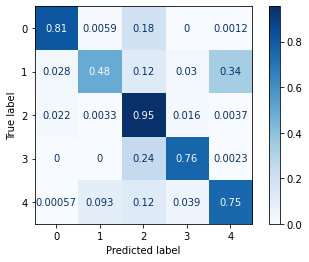

In [38]:
plot_confusion_matrix(estimator=xgb, X=X_valid, y_true=y_validXGB,
                      normalize='true', cmap='Blues')

In [39]:
y_predXGB = xgb.predict(X_test)
predictions = [round(value) for value in y_predXGB]
score_xgb = accuracy_score(y_testXGB, predictions)
f1_xgb = f1_score(y_testXGB, predictions, average='macro')
print ('Accuracy: '+str(score_xgb*100)+' %')
print ('F1-Score: '+str(f1_xgb))

Accuracy: 86.02662570404506 %
F1-Score: 0.7927827956220487


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


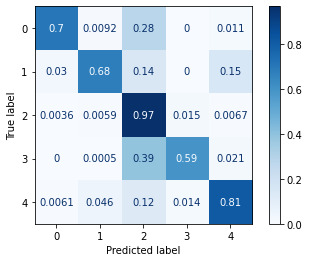

In [40]:
plot_confusion_matrix(estimator=xgb, X=X_test, y_true=y_testXGB,
                      normalize='true', cmap='Blues')

<br>

## Random UnderSampling 

In [41]:
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [42]:
xgb_rus = XGBClassifier(n_estimators=100)
le = LabelEncoder()
y_trainXGB_rus = le.fit_transform(y_train_rus)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
y_validXGB = le.fit_transform(y_valid)
y_testXGB = le.fit_transform(y_test)

In [44]:
xgb_rus.fit(X_train_rus, y_trainXGB_rus)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [45]:
y_predXGB_rus = xgb_rus.predict(X_valid)
predictions_rus = [round(value) for value in y_predXGB_rus]
score_xgb_rus = accuracy_score(y_validXGB, predictions_rus)
f1_xgb_rus = f1_score(y_validXGB, predictions_rus, average='macro')
print ('Accuracy: '+str(score_xgb_rus*100)+' %')
print ('F1-Score: '+str(f1_xgb_rus))

Accuracy: 79.05053598774884 %
F1-Score: 0.7208698138086689


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


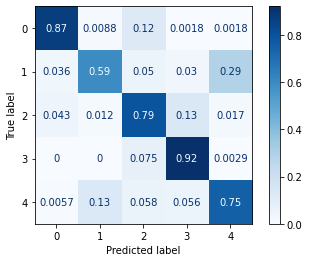

In [46]:
plot_confusion_matrix(estimator=xgb_rus, X=X_valid, y_true=y_validXGB,
                      normalize='true', cmap='Blues')

In [47]:
y_predXGB_rus = xgb_rus.predict(X_test)
predictions_rus = [round(value) for value in y_predXGB_rus]
score_xgb_rus = accuracy_score(y_testXGB, predictions_rus)
f1_xgb_rus = f1_score(y_testXGB, predictions_rus, average='macro')
print ('Accuracy: '+str(score_xgb_rus*100)+' %')
print ('F1-Score: '+str(f1_xgb_rus))

Accuracy: 83.47670250896057 %
F1-Score: 0.7849240749636835


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


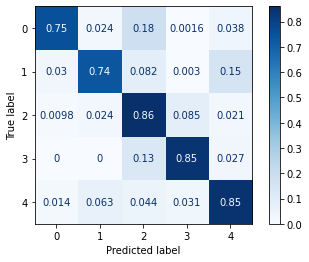

In [48]:
plot_confusion_matrix(estimator=xgb_rus, X=X_test, y_true=y_testXGB,
                      normalize='true', cmap='Blues')

# Test the full model on separate tasks Random Under Sampling

## Task A-1 

In [60]:
y_predXGB_rus = xgb_rus.predict(X_test1)
predictions_rus = [round(value) for value in y_predXGB_rus]
score_xgb_rus = accuracy_score(y_testXGB1, predictions_rus)
f1_xgb_rus = f1_score(y_testXGB1, predictions_rus, average='macro')
print ('Accuracy: '+str(score_xgb_rus*100)+' %')
print ('F1-Score: '+str(f1_xgb_rus))

Accuracy: 82.9367088607595 %
F1-Score: 0.7058644289269232


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


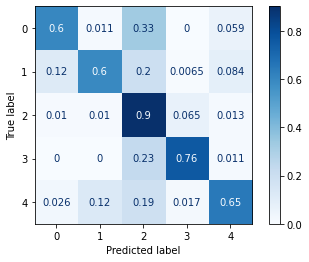

In [61]:
plot_confusion_matrix(estimator=xgb_rus, X=X_test1, y_true=y_testXGB1,
                      normalize='true', cmap='Blues')

## Task A-2 

In [62]:
y_predXGB_rus = xgb_rus.predict(X_test2)
predictions_rus = [round(value) for value in y_predXGB_rus]
score_xgb_rus = accuracy_score(y_testXGB2, predictions_rus)
f1_xgb_rus = f1_score(y_testXGB2, predictions_rus, average='macro')
print ('Accuracy: '+str(score_xgb_rus*100)+' %')
print ('F1-Score: '+str(f1_xgb_rus))

Accuracy: 82.36889692585895 %
F1-Score: 0.765127269279972


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


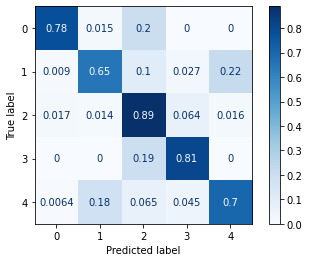

In [63]:
plot_confusion_matrix(estimator=xgb_rus, X=X_test2, y_true=y_testXGB2,
                      normalize='true', cmap='Blues')

## Task A-3 

In [64]:
y_predXGB_rus = xgb_rus.predict(X_test3)
predictions_rus = [round(value) for value in y_predXGB_rus]
score_xgb_rus = accuracy_score(y_testXGB3, predictions_rus)
f1_xgb_rus = f1_score(y_testXGB3, predictions_rus, average='macro')
print ('Accuracy: '+str(score_xgb_rus*100)+' %')
print ('F1-Score: '+str(f1_xgb_rus))

Accuracy: 73.0392156862745 %
F1-Score: 0.6360746795531553


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


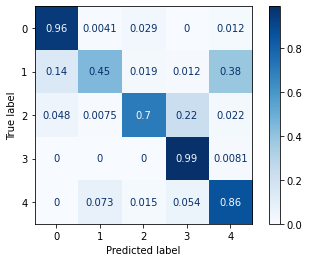

In [65]:
plot_confusion_matrix(estimator=xgb_rus, X=X_test3, y_true=y_testXGB3,
                      normalize='true', cmap='Blues')

## Task A-4

In [66]:
y_predXGB_rus = xgb_rus.predict(X_test4)
predictions_rus = [round(value) for value in y_predXGB_rus]
score_xgb_rus = accuracy_score(y_testXGB4, predictions_rus)
f1_xgb_rus = f1_score(y_testXGB4, predictions_rus, average='macro')
print ('Accuracy: '+str(score_xgb_rus*100)+' %')
print ('F1-Score: '+str(f1_xgb_rus))

Accuracy: 78.21621621621621 %
F1-Score: 0.7522325377071033


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


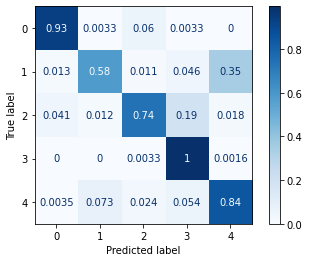

In [67]:
plot_confusion_matrix(estimator=xgb_rus, X=X_test4, y_true=y_testXGB4,
                      normalize='true', cmap='Blues')

<br>

# Testing the full model on separate tasks - Default

## Task A-1


In [68]:
y_predXGB = xgb.predict(X_test1)
predictions = [round(value) for value in y_predXGB]
score_xgb = accuracy_score(y_testXGB1, predictions)
f1_xgb = f1_score(y_testXGB1, predictions, average='macro')
print ('Accuracy: '+str(score_xgb*100)+' %')
print ('F1-Score: '+str(f1_xgb))

Accuracy: 82.32911392405063 %
F1-Score: 0.6414687360676105


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


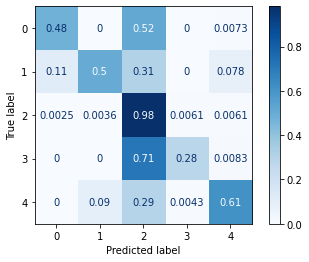

In [69]:
plot_confusion_matrix(estimator=xgb, X=X_test1, y_true=y_testXGB1,
                      normalize='true', cmap='Blues')

##  Task A-2

In [70]:
y_predXGB = xgb.predict(X_test2)
predictions = [round(value) for value in y_predXGB]
score_xgb = accuracy_score(y_testXGB2, predictions)
f1_xgb = f1_score(y_testXGB2, predictions, average='macro')
print ('Accuracy: '+str(score_xgb*100)+' %')
print ('F1-Score: '+str(f1_xgb))

Accuracy: 81.55515370705244 %
F1-Score: 0.722251035275608


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


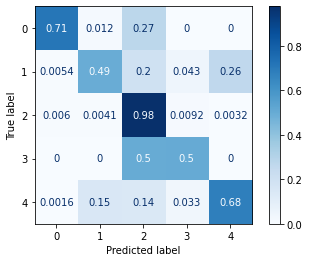

In [71]:
plot_confusion_matrix(estimator=xgb, X=X_test2, y_true=y_testXGB2,
                      normalize='true', cmap='Blues')

## Task A-3

In [72]:
y_predXGB = xgb.predict(X_test3)
predictions = [round(value) for value in y_predXGB]
score_xgb = accuracy_score(y_testXGB3, predictions)
f1_xgb = f1_score(y_testXGB3, predictions, average='macro')
print ('Accuracy: '+str(score_xgb*100)+' %')
print ('F1-Score: '+str(f1_xgb))

Accuracy: 91.44607843137254 %
F1-Score: 0.7751214778079742


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


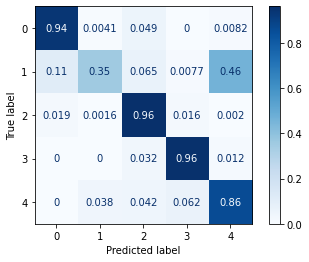

In [73]:
plot_confusion_matrix(estimator=xgb, X=X_test3, y_true=y_testXGB3,
                      normalize='true', cmap='Blues')

## Task A-4

In [74]:
y_predXGB = xgb.predict(X_test4)
predictions = [round(value) for value in y_predXGB]
score_xgb = accuracy_score(y_testXGB4, predictions)
f1_xgb = f1_score(y_testXGB4, predictions, average='macro')
print ('Accuracy: '+str(score_xgb*100)+' %')
print ('F1-Score: '+str(f1_xgb))

Accuracy: 88.5945945945946 %
F1-Score: 0.8246660205431505


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


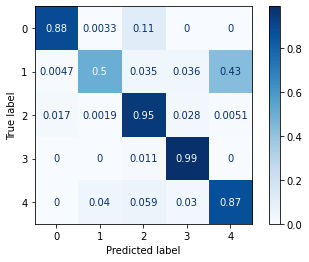

In [75]:
plot_confusion_matrix(estimator=xgb, X=X_test4, y_true=y_testXGB4,
                      normalize='true', cmap='Blues')